In [2]:
from to3Di import create_db, db_to_3Di
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
create_db("~/datasets/pdb", "./.temp/pdb_all", verbose=True)

createdb /Users/donnybertucci/datasets/pdb ./.temp/pdb_all 

MMseqs Version:        	0c32b3b538f2854a6f6a22102975c50b9d3c8592
Chain name mode        	0
Write mapping file     	0
Mask b-factor threshold	0
Coord store mode       	2
Write lookup file      	1
Tar Inclusion Regex    	.*
Tar Exclusion Regex    	^$
File Inclusion Regex   	.*
File Exclusion Regex   	^$
Threads                	12
Verbosity              	3

Output file: ./.temp/pdb_all
[=================================================================] 210.63K 5m 10s 962ms
Time for merging to pdb_all_ss: 0h 0m 0s 729ms
Time for merging to pdb_all_h: 0h 0m 0s 514ms
Time for merging to pdb_all_ca: 0h 0m 2s 199ms
Time for merging to pdb_all: 0h 0m 0s 586ms
Ignore 801210 out of 1683656.
Too short: 737185, incorrect: 0, not proteins: 64025.
Time for processing: 0h 5m 20s 445ms



In [6]:
d = db_to_3Di("./.temp/pdb_all", True)

In [7]:
df = pd.DataFrame({"name": d.names, "3Di": d.repr_3Di, "AA": d.repr_AA})

In [9]:
df["len"] = df["3Di"].apply(lambda x: len(x))

<Axes: >

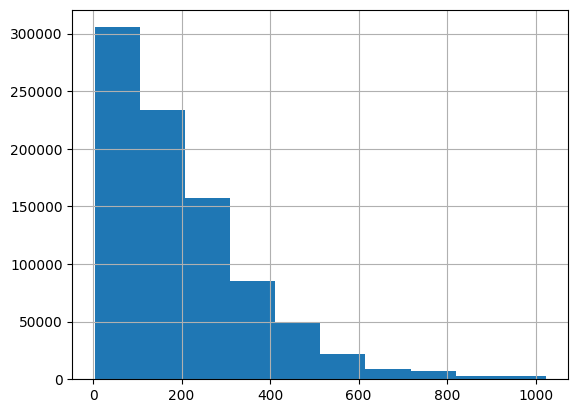

In [13]:
df[df["len"] < 1024]["len"].hist()

In [15]:
df[["name", "3Di", "AA"]].to_parquet("pdb-all.parquet", index=False)